Aluna: Thais Luca Marques de Almeida

DRE: 122024801

# Código para as Questões 5, 6, 7, 8, 9, 10 e 11

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

Funções auxiliares.

In [2]:
def get_line_plot(x,func):
    '''
        Obtém os coeficientes angular e linear da reta da função
        no formato y(x) = mx + b

        Args:
            x: pontos no eixo x
            func: vetor de pesos [w0,w1,w2] correspondente
        Result:
            valores correspondentes aos parâmetros func 
            e x passados como parâmetro
    '''

    # Teste para evitar divisão por zero
    if np.all(func==0):
        return np.zeros(len(x))

    m = -func[0]/func[1] # coeficiente angular
    b = -func[2]/func[1] # coeficiente linear
    
    # Gera a linha dados os pontos do eixo x
    return x * m + b

def plot(X,y_true,h_func):
    '''
        Função que "plota" os dados de treinamento junto à hipótese

        Args:
            X: valores dos dados de treinamento [-1,1] x [-1,1]
            Y: labels dos dados de treinamento 
            h_func: função hipótese do perceptron

    '''

    plt.figure()
    
    # Filtra e plota os exemplos negativos
    x_negs = [X[i][0] for i in range(len(X)) if y_true[i] < 0] 
    y_negs = [X[i][1] for i in range(len(X)) if y_true[i] < 0]
    plt.scatter(x_negs,y_negs,color='red')
    
    # Filtra e plota os exemplos positivos
    x_pos = [X[i][0] for i in range(len(X)) if y_true[i] > 0]
    y_pos = [X[i][1] for i in range(len(X)) if y_true[i] > 0]
    plt.scatter(x_pos,y_pos,color='green')
    
    # Plota a hipótese
    xplt = np.linspace(-1, 1, 100)
    yplt2 = get_line_plot(xplt, h_func)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.plot(xplt,yplt2,color='black',label='$g(x)$')

    plt.legend()
    plt.grid(True)
    
    plt.show()

def create_target_function():
    '''
        Gera a função target que determina a classificação dos dados de treinamento

        Result:
            array com três posições w0 = m, w1 = -1, w2 = b, 
            onde m e b são os coeficientes angular e linear, 
            respectivamente
    '''

    #Pego dois pontos aleatórios no espaço [-1,1] x [-1,1]
    p0 = random.uniform(-1,1), random.uniform(-1,1)
    p1 = random.uniform(-1,1), random.uniform(-1,1)

    #Calcula o coeficiente angular 
    m = (p1[1]-p0[1])/(p1[0]-p0[0])
    
    # Calcula o coeficiente linear
    b = p0[1] - (p0[0] * m)
    
    # Gero a função target 
    # w0 = m, w1 = -1, w2= b
    # y = m*x + b -> m*x -y + b = 0
    return np.array([m,-1,b])

def generate_training_data(N,f_target):
    '''
        Gera um conjunto de dados linearmente separável pela função target 
        (desconhecida)

        Args:
            N: número de exemplos a serem gerados
            f_target: função target que separa esses dados
        Result:
            X_sample: vetor contendo os pontos (x,y) dos dados de treinamento e;
            y_sample: vetor contendo as labels dos dados de treinamento
    '''
    y_sample = []

    # Gerando a amostra de N pontos no espaço [-1,1] x [-1,1]
    X_sample = np.random.uniform(low=-1, high=1, size=(N,2))
    X_sample = [np.concatenate((X_sample[i],np.array([1.]))) for i in range(N)]
    for i in range(N):
        y_sample.append(1 if np.dot(f_target,X_sample[i]) > 0 else -1) # Classificação do ponto gerado segundo a função target passada como parâmetro
    
    return np.array(X_sample), np.array(y_sample)


def generate_training_data_non_linear_transformation(N):
    '''
        Gera um conjunto de dados segundo a função target 
        informada no enunciado da questão 8

        Args:
            N: número de exemplos a serem gerados
        Result:
            X_sample: vetor contendo os pontos (x,y) dos dados de treinamento e;
            y_sample: vetor contendo as labels dos dados de treinamento
    '''
    y_sample = []

    # Gerando a amostra de N pontos no espaço [-1,1] x [-1,1]
    X_sample = np.random.uniform(low=-1, high=1, size=(N,2))
    X_sample = [np.concatenate((X_sample[i],np.array([1.]))) for i in range(N)]
    for i in range(N):
        value = X_sample[i][0]**2 + X_sample[i][1]**2 - 0.6
        y_sample.append(1 if value > 0 else -1) # Classificação do ponto gerado segundo a função target passada como parâmetro
    
    return np.array(X_sample), np.array(y_sample)

***Classe Regressão Linear***

In [3]:
class LinearRegression:
    '''
        Classe que implementa o algoritmo de Regressão Linear
    '''
    
    def __init__(self):
        self.w = np.zeros(3)

        
    def fit(self,X,y):
        '''
            Função que calcula os pesos da Regressão Linear
            a partir dos dados de treinamento
            
            w = X'*y
            
            onde X' é a pseudo-inversa de X, dada por:
            X' = (X.T*X)^(-1) * X.T
            
            Este é chamado de one-step learning porque
            tem apenas um passo de aprendizado. 
            Basta resolver o sistema acima para obter os
            valores de w que resolve o sistema Xw = y

            Args:
                X: valores dos dados de treinamento [-1,1] x [-1,1]
                y: labels dos dados de treinamento 
        '''
        
        # Para encontrar a reta que melhor descreve os pontos, 
        # queremos resolver o seguinte sistema
        # X.T * X * w = X.T * y
        
        # Primeiro multiplicamos X e y por suas matrizes transpostas
        # aqui é usado um operador de matrizes
        A = np.matmul(X.T,X)
        b = np.matmul(X.T,y)
        
        # Para encontrar o vetor w, precisamos resolver o sistema Ax=b
        # vamos usar a seguinte função do Numpy
        self.w = np.linalg.solve(A, b)
    
    def __sign(self,pt):
        '''
            Define a classificação do ponto de acordo com o produto interno 
            entre o ponto e o vetor w
            
            Args:
                pt: ponto a ser classificado
            Result:
                valor inteiro correspondente ao rótulo do dado segundo w
        '''
        return 1 if np.dot(self.w,pt) > 0 else -1
    
    def predict(self, X):
        '''
            Realiza a predição de todos os pontos do conjunto de treinamento 
            de acordo com o vetor w

            Args:
                X: pontos (x,y) do conjunto de treinamento
            Return:
                lista de rótulos de classificação de acordo com w
        '''
        return [self.__sign(x) for x in X]

Funções para medir o erro dentro e fora da amostra

In [4]:
def get_error(y,preds):
    '''
        Calcula o erro binário de todas as predições
        Na prática, conta quantas vezes o valor de saída
        foi diferente do valor esperado

        Args:
            X: pontos (x,y) do conjunto de treinamento
        Return:
            erro médio binário
    '''
        
    # Neste problema, temos uma saída binária,
    # por isso vamos calcular quantas vezes 
    # h(x) é diferente de f(x)
    # onde h é a hipótese e f a target
    error = 0
    for y_true,y_pred in zip(y,preds):
        if y_true != y_pred:
            error += 1/len(preds)
    return error

***Classe Perceptron***

In [5]:
class Perceptron:
    '''
        Classe que implementa o Perceptron e o PLA
    '''

    def __init__(self,g,show_plot=False):
        self.g = g
        self.show_plot = show_plot

    def __sign(self,func,pt):
        '''
            Define a classificação do ponto de acordo com o produto interno 
            entre o ponto e a função
            
            Args:
                func: função que separa os dados em +1 ou -1
                pt: ponto a ser classificado
            Result:
                valor inteiro correspondente ao rótulo do dado segundo func
        '''
        return 1 if np.dot(func,pt) > 0 else -1

    def __update_weights(self,X,y):
        '''
            Atualiza o vetor de pesos da função hipótese g
            O vetor de pesos é atualizado de acordo com um dos pontos 
            classificados incorretamente
            O ponto é escolhido de forma aleatória dentro do conjunto

            Args:
                X: dados de treinamento classificados de forma incorreta
                y: classificação dada por g (incorreta)
            Result:
                os pesos da reta g atualizados de acordo com um dos pontos
                classificados de forma incorreta escolhido de forma aleatória
        '''

        #Escolhe um ponto aleatoriamente
        i = random.randint(0,len(X)-1)

        # weight vector
        w = self.g
        
        #Atualiza os pesos
        # w(t+1) = w(t) + y(t)*x(t)
        # Nesse caso, vamos usar w(t+1) = w(t) - y(t)*x(t) 
        # porque consideramos m*x - y + b = 0
        w = w - y[i]*X[i]
        
        return w

    def __get_miss_classified_examples(self,X,y_pred,y_true):
        '''
            Compara os rótulos de cada exemplo y_pred com y_true para retornar 
            quais pontos não foram classificados corretamente por g

            Args:
                X: pontos (x,y) do conjunto de treinamento
                y_pred: rótulos previstos por g (hipótese)
                y_true: valores reais do rótulos de acordo com a função target 
                desconhecida
            Returns:
                as coordenadas dos pontos classificados incorretamente 
                e os rótulos divergentes dos rótulos reais
        '''
        X_mislabeled,y_mislabeled = [],[]
        for i in range(len(y_true)):
            if y_pred[i] != y_true[i]:
                X_mislabeled.append(X[i])
                y_mislabeled.append(y_pred[i])
        return X_mislabeled,y_mislabeled

    def predict(self, X, function):
        '''
            Realiza a predição de todos os pontos do conjunto de treinamento 
            de acordo com a função passada como parâmetro

            Args:
                X: pontos (x,y) do conjunto de treinamento
                function: função que irá classificar os pontos
            Return:
                lista de rótulos de classificação de acordo com a 
                função function
        '''
        return [self.__sign(function,x) for x in X]

    def train(self,X,y):
        '''
            Perceptron Learning Algorithm

            Começando com g passada como parâmetro, 
            a reta é atualizada de acordo com os exemplos que 
            não foram classificados corretamente.
            O algoritmo termina quando não há mais pontos classificados 
            incorretamente.
            
            Args:
                X: pontos (x,y) do conjunto de treinamento
                y: rótulos dos pontos passados como parâmetro
            Return:
                número de iterações necessárias para conversão do modelo
        '''

        # Inicializo o número de iterações como zero
        n_iteractions = 0

        while True:

            # Inicializo os arrays de predição 
            # e exemplos que não foram classificados corretamente
            X_miss_classified, y_miss_classified, predicted = [], [], []

            # Predição dos exemplos pela função hipótese
            predicted = self.predict(X,self.g)
        
            # Coleto todos os pontos que não foram classificados corretamente
            X_miss_classified,y_miss_classified = self.__get_miss_classified_examples(X,predicted,y)
        
            #print(f'Número de pontos classificados de forma errada: {len(X_miss_classified)}')

            # Desenho os pontos e as funções na tela (opcional)
            if self.show_plot:
                plot(X,y,self.g)

            # Se todos os pontos foram classificados corretamente, 
            # encerra o programa
            if len(X_miss_classified) == 0:
                break

            # Uso os pontos que não foram classificados corretamente 
            # para ajustar os pesos de g
            self.g = self.__update_weights(X_miss_classified,y_miss_classified)
            
            # Cada vez que atualizo os pesos, conto uma iteração
            n_iteractions += 1
            
        return n_iteractions
    
    def train_pocket(self,X,y,k):
        '''
            Perceptron Learning Algorithm (Pocket)

            Começando com g passada como parâmetro, 
            a reta é atualizada de acordo com os exemplos que 
            não foram classificados corretamente.
            
            A cada iteração, o algoritmo verifica se a nova
            função g é melhor do que anterior, i.e, se esta
            gera um número menor de pontos classificados 
            incorretamente.
            
            O algoritmo termina quando não há mais pontos classificados 
            incorretamente ou após k iterações.
            
            Args:
                X: pontos (x,y) do conjunto de treinamento
                y: rótulos dos pontos passados como parâmetro
                k: número de iterações
            Return:
                a melhor hipótese encontrada durante as k iterações,
                i.e., a hipótese que mais classificou exemplos
                corretamente
        '''

        # Guarda quantos pontos foram classificados
        # de forma incorreta na última atualização
        # dos pesos de g
        
        # No pior caso, nenhum ponto é classificado corretamente
        previous_n_miss_classified = len(X)
        
        # No pior caso, a melhor reta é a de início da execução do PLA
        best_g = np.zeros(3)
        
        for i in range(k):

            # Inicializo os arrays de predição 
            # e exemplos que não foram classificados corretamente
            X_miss_classified, y_miss_classified, predicted = [], [], []

            # Predição dos exemplos pela função hipótese
            predicted = self.predict(X,self.g)
        
            # Coleto todos os pontos que não foram classificados corretamente
            X_miss_classified,y_miss_classified = self.__get_miss_classified_examples(X,predicted,y)

            # Desenho os pontos e as funções na tela (opcional)
            if self.show_plot:
                plot(X,y,self.g)
                print(f'Número de pontos classificados de forma errada: {len(X_miss_classified)}')
                print(f'Melhor hipótese: {best_g}')

            # Se todos os pontos foram classificados corretamente, 
            # encerra o programa
            if len(X_miss_classified) == 0:
                break
            
            # Verifico se não é a primeira iteração e se
            # a nova g é melhor do que a anterior
            if i > 0 and len(X_miss_classified) < previous_n_miss_classified:
                best_g = self.g[:]
                previous_n_miss_classified = len(X_miss_classified)

            # Uso os pontos que não foram classificados corretamente 
            # para ajustar os pesos de g
            self.g = self.__update_weights(X_miss_classified,y_miss_classified)
            
        return best_g

# Exercícios

**Questão 5**

Erro dentro da amostra após 1000 experimentos com 100 pontos.

In [6]:
# Quantidade de pontos e o valor de E_in (erro dentro da amostra)
N = 100
E_in = 0

for i in range(1000):

    # Inicializa a função objetivo
    f_target = create_target_function()

    # Gera o conjunto de treinamento
    X,y = generate_training_data(N,f_target)

    # Inicializa a classe que implementa a Regressão Linear
    model = LinearRegression()

    # Treinamento do modelo - one step learning
    model.fit(X,y)
    
    # Uso o modelo pra fazer a predição dos dados dentro da amostra segundo a hipótese
    preds = []
    preds = model.predict(X)
    
    # Calculo o erro da função hipótese encontrado pelo algoritmo
    E_in += get_error(y,preds)

print(E_in/1000)

0.03872000000000003


Resposta letra [c].

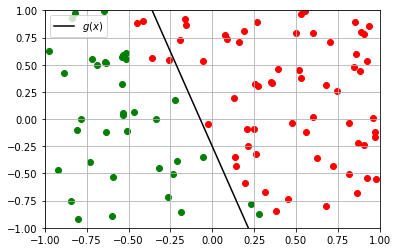

In [7]:
plot(X,y,model.w)

**Questão 6**

Cálculo do erro utilizando novos 1000 pontos fora da amostra. Utilizando o modelo encontrado no exercício anterior.

In [8]:
# Quantidade de pontos e o valor de E_out (erro fora da amostra)
N = 1000
E_out = 0

for i in range(1000):

    # Gero o novos dados fora do conjunto de treinamento
    # utilizando a mesma função target do exercício anterior
    new_X,new_y = generate_training_data(N,f_target)
    
    # Uso o modelo pra fazer a predição dos novos dados segundo a hipótese
    preds = []
    preds = model.predict(new_X)
    
    # Calculo o erro da função hipótese encontrado pelo algoritmo
    E_out += get_error(new_y,preds)

print(E_out/1000)

0.05643099999999991


Resposta letra [c].

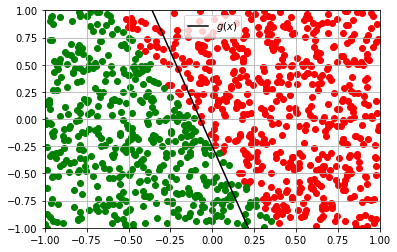

In [9]:
plot(new_X,new_y,model.w)

**Questão 7**

In [16]:
# Quantidade de pontos e o número de iterações totais
N = 10
total_iteractions = 0

for i in range(1000):

    # Inicializa a função objetivo
    f_target = create_target_function()

    # Gera o conjunto de treinamento
    X,y = generate_training_data(N,f_target)

    # Inicializa a classe que implementa a Regressão Linear
    LA_model = LinearRegression()

    # Treinamento do modelo - one step learning
    LA_model.fit(X,y)
    
    # Utilizo os pesos da Regressão Linear para inicializa o vetor de pesos do Perceptron
    perceptron_model = Perceptron(LA_model.w,show_plot=False)

    # Treinamento do modelo
    n_iteractions = perceptron_model.train(X,y)

    # Armazena o número de iterações da rodada atual
    total_iteractions += n_iteractions

print(total_iteractions/1000)

3.465


Resposta letra [a].

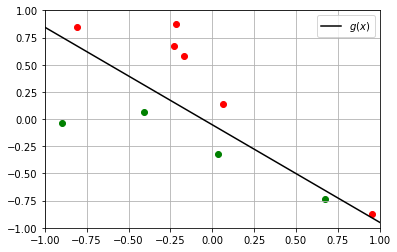

In [17]:
plot(X,y,perceptron_model.g)

**Questão 8**

In [28]:
# Quantidade de pontos e o valor de E_in (erro dentro da amostra)
N = 1000
E_in = 0

for i in range(1000):

    # Gera o conjunto de treinamento
    # f_target = sign(x_1**2 + x_2**2 - 0.6)
    X,y = generate_training_data_non_linear_transformation(N)
    
    # Gerando ruído
    # Primeiro, vamos selecionar 10% dos pontos
    # neste caso, pegaremos os índices dos valores
    # a terem seus valores de y trocados
    flipped = random.sample(range(N),int(N*0.1))
    for i in flipped:
        y[i] *= -1

    # Inicializa a classe que implementa a Regressão Linear
    model = LinearRegression()

    # Treinamento do modelo - one step learning
    model.fit(X,y)
    
    # Uso o modelo pra fazer a predição dos dados dentro da amostra segundo a hipótese
    preds = []
    preds = model.predict(X)
    
    # Calculo o erro da função hipótese encontrado pelo algoritmo
    E_in += get_error(y,preds)

print(E_in/1000)

0.5041430000000001


Resposta letra [d].

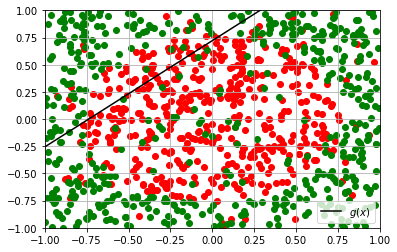

In [29]:
plot(X,y,model.w)

**Questão 9**

In [30]:
# Número de rodadas do experimento
few_runs = 1000

# Número de pontos
N = 1000

# Primeiro transformo os dados de acordo com a transformação
# passada no enunciado
# Utilizo o mesmo conjunto de dados de treinamento
# da questão anterior

X_transformed = []
for x in X:
    #(1,x1,x2,x1*x2,x1**2,x2**2)
    X_transformed.append(np.array([1,x[0],x[1],x[0]*x[1],x[0]**2,x[1]**2]))
X_transformed = np.array(X_transformed)

# Array para armazenar os valores de w e calcular a média 
# em todas as rodadas
w = np.zeros(len(X_transformed[0]))

# Repito o experimento algumas vezes 
for i in range(few_runs):
    
    # Inicializa a classe que implementa a Regressão Linear
    model = LinearRegression()

    # Treinamento do modelo - one step learning
    model.fit(X_transformed,y)
    
    # Somo o valor encontrado nessa rodada ao 
    # valor de w anterior, elemento a elemento
    w = np.sum([w,model.w],axis=0)

# Média de todas as rodadas
print(w/few_runs)

[-1.00083524  0.05711832 -0.07344549 -0.08150452  1.62526925  1.5622902 ]


Neste caso, a resposta mais próxima é a letra [a]. Todas as alternativas tem um valor próximo ao primeiro elemento w0, o mesmo acontece para w1, com exceção da letra [d]. O valor de w3 também se aproxima de todas as alternativas, exceto a letra [e]. Já w4 só se aproxima das alternativas [a] e [b], enquanto que w5 apenas das letras [a] e [e]. Portanto, a alternativa [a] é a que mais se aproxima do resultado encontrado.

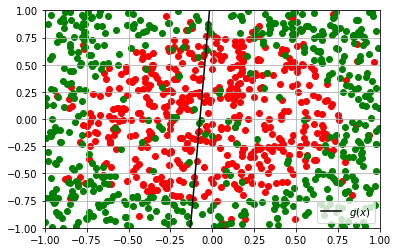

In [31]:
plot(X,y,w)

**Questão 10**

In [32]:
# Quantidade de pontos e o valor de E_out (erro fora da amostra)
N = 1000
E_out = 0

for i in range(1000):

    # Gero um novo conjunto com a mesma função target 
    # da questão anterior
    # f_target = sign(x_1**2 + x_2**2 - 0.6)
    X,y = generate_training_data_non_linear_transformation(N)
    
    # Gerando ruído
    # Primeiro, vamos selecionar 10% dos pontos
    # neste caso, pegaremos os índices dos valores
    # a terem seus valores de y trocados
    flipped = random.sample(range(N),int(N*0.1))
    for i in flipped:
        y[i] *= -1
        
    # Antes de fazer a predição dos novos dados,
    # devemos transformá-los da mesma forma
    # que fizemos com o conjunto de treinamento
    X_transformed = []
    for x in X:
        #(1,x1,x2,x1*x2,x1**2,x2**2)
        X_transformed.append(np.array([1,x[0],x[1],x[0]*x[1],x[0]**2,x[1]**2]))
    X_transformed = np.array(X_transformed)
    
    # Uso o modelo pra fazer a predição dos dados fora da amostra segundo a hipótese
    preds = []
    preds = model.predict(X_transformed)
    
    # Calculo o erro da função hipótese encontrado pelo algoritmo
    E_out += get_error(y,preds)

print(E_out/1000)

0.12521499999999988


Resposta letra [b].

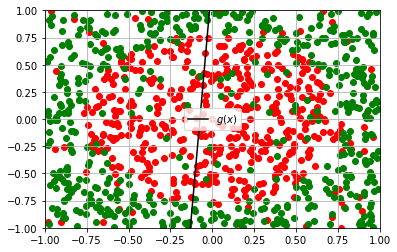

In [33]:
plot(X,y,model.w)

**Questão 11**

Primeiro gero o conjunto de dados de treinamento utilizado nos exercícios 11.1, 11.2, 11.3, e 11.4.

In [41]:
# Inicializo o número de pontos
N = 100

# Inicializa a função objetivo
f_target = create_target_function()

# Gera o conjunto de treinamento
X,y = generate_training_data(N,f_target)

# Gerando ruído
# Primeiro, vamos selecionar 10% dos pontos
# neste caso, pegaremos os índices dos valores
# a terem seus valores de y trocados
flipped = random.sample(range(N),int(N*0.1))
for i in flipped:
    y[i] *= -1

**11.1**

Utilizo o Perceptron com dados não linearmente separáveis e k = 10 iterações, iniciando g (hipótese inicial) como um vetor de zeros.

In [44]:
# Inicializo o número de iterações
k = 10

# Quantidade de pontos e o valor de E_out (erro fora da amostra)
N = 1000
E_out = 0

# True para mostrar o gráfico a cada iteração; False cc
show_plot = False

for i in range(1000):

    # Inicializo a classe Perceptron com g sendo um vetor de zeros
    perceptron_model = Perceptron(np.zeros(3),show_plot=show_plot)

    # Treinamento do modelo usando o PLA pocket
    best_g = perceptron_model.train_pocket(X,y,k)

    # Gero o novo conjunto de dados (fora da amostra) com 1000 pontos
    # usando a mesma função target (sem ruído)
    new_X,new_y = generate_training_data(N,f_target)

    # Uso o modelo pra fazer a predição dos novos dados
    preds = []
    preds = perceptron_model.predict(new_X,best_g)

    # Calculo o erro fora da amostra, usando os novos pontos
    E_out += get_error(y,preds)
print(E_out/1000)

0.046145999999999805


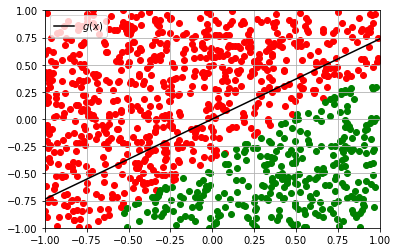

In [45]:
plot(new_X,new_y,best_g)

**11.2**

Repito o experimento anterior para k = 50, inicializando os pesos de g (hipótese inicial) como zero.

In [46]:
# Inicializo o número de iterações
k = 50

# Quantidade de pontos e o valor de E_out (erro fora da amostra)
N = 1000
E_out = 0

# True para mostrar o gráfico a cada iteração; False cc
show_plot = False

for i in range(1000):
    
    # Inicializo a classe Perceptron com g sendo um vetor de zeros
    perceptron_model = Perceptron(np.zeros(3),show_plot=show_plot)

    # Treinamento do modelo usando o PLA pocket
    best_g = perceptron_model.train_pocket(X,y,k)

    # Gero o novo conjunto de dados (fora da amostra) com 1000 pontos
    # usando a mesma função target
    new_X,new_y = generate_training_data(N,f_target)

    # Uso o modelo pra fazer a predição dos novos dados
    preds = []
    preds = perceptron_model.predict(new_X,best_g)

    # Calculo o erro fora da amostra, usando os novos pontos
    E_out += get_error(y,preds)
print(E_out/1000)

0.043204999999999896


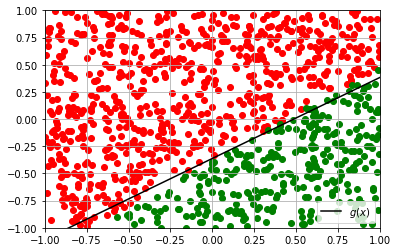

In [47]:
plot(new_X,new_y,best_g)

**11.3**

Utilizo o Perceptron com dados não linearmente separáveis e k = 10 iterações. Para este exercícios, iremos utilizar os pesos da regressão linear para iniciar a função hipótese (g) do Perceptron.

In [48]:
# Inicializo o número de iterações
k = 10

# Quantidade de pontos e o valor de E_out (erro fora da amostra)
N = 1000
E_out = 0

for i in range(1000):

    # Inicializa a classe que implementa a Regressão Linear
    LA_model = LinearRegression()

    # Treinamento do modelo - one step learning
    LA_model.fit(X,y)

    # Inicializo a classe Perceptron com g sendo o vetor de pesos encontrado na Regressão Linear
    perceptron_model = Perceptron(LA_model.w,show_plot=show_plot)

    # Treinamento do modelo usando o PLA pocket
    best_g = perceptron_model.train_pocket(X,y,k)

    # Gero o novo conjunto de dados (fora da amostra) com 1000 pontos
    # usando a mesma função target
    new_X,new_y = generate_training_data(N,f_target)

    # Uso o modelo pra fazer a predição dos novos dados
    preds = []
    preds = perceptron_model.predict(new_X,best_g)

    # Calculo o erro fora da amostra, usando os novos pontos
    E_out += get_error(y,preds)
print(E_out/1000)

0.04626699999999982


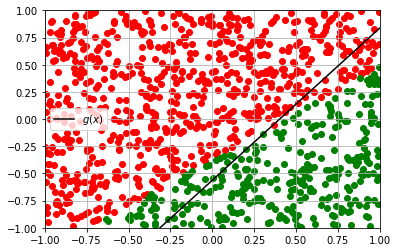

In [49]:
plot(new_X,new_y,best_g)

**11.4**

Repito o experimento anterior com k = 50. Novamente, utilizo os pesos da regressão linear como hipótese (g) inicial do Perceptron.

In [50]:
# Inicializo o número de iterações
k = 50

# Quantidade de pontos e o valor de E_out (erro fora da amostra)
N = 1000
E_out = 0

for i in range(1000):

    # Inicializa a classe que implementa a Regressão Linear
    LA_model = LinearRegression()

    # Treinamento do modelo - one step learning
    LA_model.fit(X,y)

    # Inicializo a classe Perceptron com g sendo o vetor de pesos encontrado na Regressão Linear
    perceptron_model = Perceptron(LA_model.w,show_plot=show_plot)

    # Treinamento do modelo usando o PLA pocket
    best_g = perceptron_model.train_pocket(X,y,k)

    # Gero o novo conjunto de dados (fora da amostra) com 1000 pontos
    # usando a mesma função target
    new_X,new_y = generate_training_data(N,f_target)

    # Uso o modelo pra fazer a predição dos novos dados
    preds = []
    preds = perceptron_model.predict(new_X,best_g)

    # Calculo o erro fora da amostra, usando os novos pontos
    E_out += get_error(y,preds)
print(E_out/1000)

0.045851999999999775


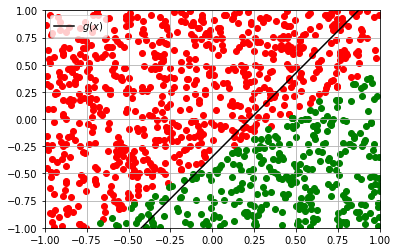

In [51]:
plot(new_X,new_y,best_g)

# Interpretação dos Resultados

Comparando os resultados obtidos na questão 6 com os resultados do Perceptron da Lista 1, podemos perceber que, quando utilizamos o algoritmo de Regressão Linear, temos um erro fora da amostra menor do que o encontrado no exercício 8 da Lista 1. Contudo, a função não aproxima os dados de treinamento corretamente, o que pode ser visto no gráfico da questão 5.

Já quando usamos os pesos encontrados pelo algoritmo de Regressão Linear para inicializar o PLA, podemos perceber que há uma diminuição no número de iterações necessárias para convergência do algoritmo. O que diminui bastante o tempo de treinamento para o mesmo número de pontos, uma vez que a Regressão Linear é um algoritmo de passo único.

Quando é adicionado ruído à amostra, podemos ver que o erro dentro da amostra é bem alto. O que já é esperado pois não temos mais dados linearmente separáveis. Quando usamos uma transformação não linear para classificar esses pontos, podemos ver que o erro fora da amostra, como apresentado no exercício 10, é de apenas 12%, mostrando que transformações não lineares são eficientes quando não temos dados linearmente separáveis.

Analisando os resultados quando usado o PLA Pocket, podemos perceber que temos uma melhor aproximação da função quando aumentamos o número de iterações, o que era esperado. Mais iterações podem ser necessárias para garantir que o algoritmo se ajuste melhor aos dados. Quando utilizamos os pesos do modelo de Regressão Linear para inicializar o PLA Pocket, temos um erro bem similar ao produzido inicializando a hipótese como um vetor de zeros. Quando aumentamos o número de iterações, ainda temos um erro similar. Nenhuma das aproximações da questão 11 separa totalmente os dados, o que pode ser justificado pelos modelos terem sido treinados em dados que continham ruído.